In [ ]:
import pandas as pd
import lightgbm as lgb
from tqdm import tqdm
from urllib import request
from iris import IRIS

In [ ]:
df = pd.read_csv("en.openfoodfacts.org.products.csv", sep="\t")

In [ ]:
df = df[[
    "code",
    "product_name",
    "brands",
    "image_url",
    "energy-kcal_100g",
    "fat_100g",
    "saturated-fat_100g",
    "proteins_100g",
    "carbohydrates_100g",
    "fiber_100g",
    "sugars_100g",
    "salt_100g",
    "nutriscore_grade",
]]

In [ ]:
df['code'] = df['code'].astype(str)

In [ ]:
df = df.dropna(subset=["proteins_100g","fat_100g","carbohydrates_100g"])

In [ ]:
df = df.sample(frac=1, random_state=42)

In [ ]:
x_cols = [
    "energy-kcal_100g",
    "fat_100g",
    "saturated-fat_100g",
    "proteins_100g",
    "carbohydrates_100g",
    "fiber_100g",
    "sugars_100g",
    "salt_100g"
]
y_col = "nutriscore_grade"

In [ ]:
df_te = df[df[y_col].isna()]
df = df[~df[y_col].isna()]
len(df)

In [ ]:
tr_size = 400000
df_tr = df.iloc[:tr_size]
df_va = df.iloc[tr_size:]

In [ ]:
x_tr = df_tr[x_cols]
y_tr = df_tr[y_col].astype('category')
x_va = df_va[x_cols]
y_va = df_va[y_col].astype('category')
x_te = df_te[x_cols]

In [ ]:
model = lgb.LGBMClassifier(n_estimators=250)

In [ ]:
model.fit(x_tr, y_tr, eval_set=(x_va, y_va), early_stopping_rounds=20)

In [ ]:
(model.predict(x_tr) == y_tr).mean()

In [ ]:
(model.predict(x_va) == y_va).mean()

In [ ]:
df_te[y_col] = model.predict(x_te)

In [ ]:
df = pd.concat([df_tr, df_va, df_te], axis=0).sort_values('code')

In [ ]:
df.to_csv('data_full.csv.gz', index=False, compression='gzip')

In [ ]:
df = df.loc[~df["image_url"].isna()]
mask = [True if "_de" in x else False for x in df["image_url"].values]
df = df[mask]

In [ ]:
def path2fname(path):
    prefix = "https://static.openfoodfacts.org/images/products/"
    return "imgs/"+path.replace(prefix, "").replace("/", "-")

In [ ]:
df["path"] = df["image_url"].apply(path2fname)

In [ ]:
df.reset_index(inplace=True, drop=True)

In [ ]:
df.head()

In [ ]:
for i, row in df.iterrows():
    try:
        request.urlretrieve(row["image_url"], row["path"])
    except:
        pass

In [34]:
df.to_csv('data_de.csv', index=False)

In [ ]:
iris = IRIS(df)

In [ ]:
iris.save()

In [26]:
iris = IRIS("iris_210118090818.feather")

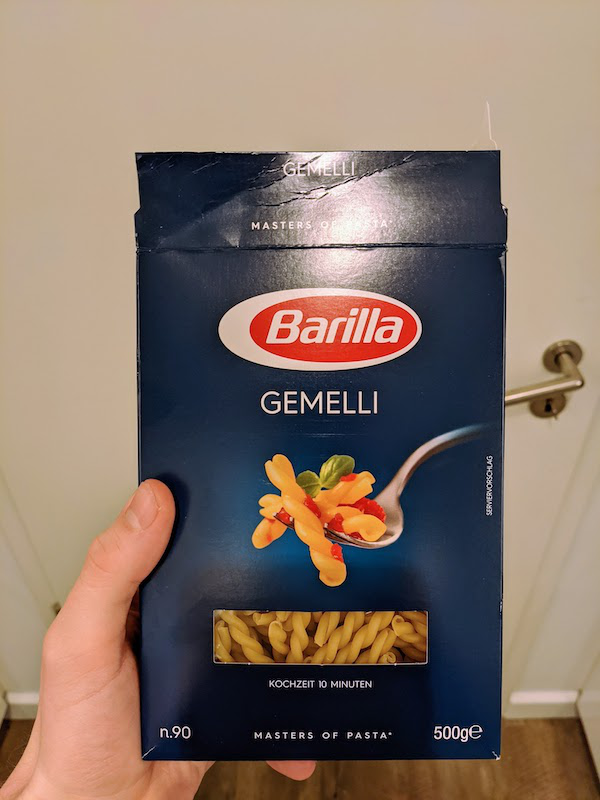

In [29]:
iris.show("barilla.jpg")

In [30]:
iris.search("barilla.jpg")

[27448, 27449, 6989, 2306, 25645, 16349, 27461, 27011, 15794, 17019]

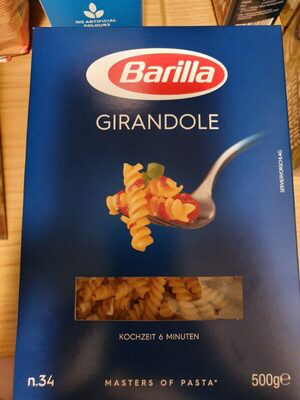

In [31]:
iris.show(27448)

In [32]:
iris.meta.loc[27448]

code                                                      8076809512268
product_name                                   Girandole Torsades n. 34
brands                                                          Barilla
image_url             https://static.openfoodfacts.org/images/produc...
energy-kcal_100g                                                    359
fat_100g                                                              2
saturated-fat_100g                                                  0.5
proteins_100g                                                      12.5
carbohydrates_100g                                                 71.2
fiber_100g                                                            3
sugars_100g                                                         3.5
salt_100g                                                         0.013
nutriscore_grade                                                      a
path                         imgs/807-680-951-2268-front_de.105.

In [ ]:
iris.show(iris.meta.loc[27448, "nutriscore_grade"]+".png")